In [1]:
def example():
    print('this code will run')
    z = 3+9
    print(z)
    
example()


this code will run
12


In [2]:
def simple_addition(num1, num2):
    answer = num1 + num2
    print ('num1 is', num1)
    print(answer)
    
simple_addition(5,3)


('num1 is', 5)
8


In [ ]:
##WRITE
text = 'Sample Text to Save\nNew line!'

# notifies Python that you are opening this file, with the intention to write
saveFile = open('exampleFile.txt','w')

# actually writes the information
saveFile.write(text)

# It is important to remember to actually close the file, otherwise it will
# hang for a while and could cause problems in your script
saveFile.close()

##APPEND
# so here, generally it can be a good idea to start with a newline, since
# otherwise it will append data on the same line as the file left off.
# you might want that, but I'll use a new line.
# another option used is to first append just a simple newline
# then append what you want. 
appendMe = '\nNew bit of information'

appendFile = open('exampleFile.txt','a')
appendFile.write(appendMe)
appendFile.close()

##READ
# similar syntax as you've seen, 'r' for read. You can just throw a .read() at
# the end, and you get:
readMe = open('exampleFile.txt','r').read()
print(readMe)

##GET USER INPUT
x = input('What is your name?: ')
print('Hello',x)

##STATISTICS
import statistics

example_list = [5,2,5,6,1,2,6,7,2,6,3,5,5]

x = statistics.mean(example_list)
print(x)



Populating the interactive namespace from numpy and matplotlib


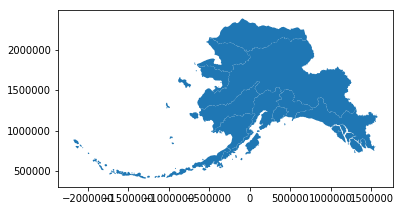

In [5]:
%pylab inline
import geopandas as gpd
import os

in_data_dir = "data/"
# out_data_dir =

##pass in sasap_regions shapefile, convert CRS to Alaska Albers (epsg 3338)
sasap_regions = "https://knb.ecoinformatics.org/knb/d1/mn/v2/object/urn%3Auuid%3Af6ab206b-312c-4caf-89c8-89eb9d031aac" #name of sasap regions shapefile in in_data_dir
sasap_reg = gpd.read_file(sasap_regions).to_crs(epsg=3338)
sasap_reg.simplify(1000).plot()         #this plots the regions shapefile (simplify(1000)??)

In [4]:
sasap_reg.head()

,region_id,region,geometry
0,1,Aleutian Islands,(POLYGON ((-1156665.959195634 420855.093106978...
1,2,Arctic,"POLYGON ((571289.9424044377 2143072.479559345,..."
2,3,Bristol Bay,(POLYGON ((-339688.5870041371 973904.876117813...
3,4,Chignik,(POLYGON ((-114381.9018728056 649966.806579367...
4,5,Copper River,"POLYGON ((561012.0068005103 1148300.750064242,..."


In [1]:
##import sasap_regions with Shapely as a geometric object too
##figure out how to select a single region (Norton Sound) from sasap_regions

##pass in pink salmon shapefile as a geodataframe with GeoPandas
pink_salmon_fn = os.path.join(in_data_dir, "AllSalmon_sasap_final.shp")             #Will use AllSalmon_sasap_final shapefile for final analysis
pk_sal = gpd.read_file(pink_salmon)     #read in shapefile with geopandas
pk_sal = pk_sal.to_crs(epsg=3338)       #change reference system to Alaska Albers
len(pk_sal)                             #see how many geometries there are

Clip pk_sal by selected sasap_regions (Norton Sound)
Export results of clip to a new shapefile and save to out_data_dir

export stream length attribute table to a .csv file (containing at least species, region, and total stream length)
deleteintermediary clipped shapefiles (only need to retain .csv files as output)
convert stream length in .csv from meters to kilometers. 

In [ ]:
# all psuedo-code. may not work, but describes what we want to do
def clip_species_data(species_df, individual_region_geom):
    return species_df.instersection(individual_region_geom).length.sum()
    

In [ ]:
# assuming there's a species column (called 'species') in All_Salmon_sasap:
for species in All_Salmon_sasap.species.unique():
    species_df = All_Salmon_sasap.query("species == @species")
    sasap_reg[species] = sasap_reg.geometry.apply(lambda g: clip_species_data(species_df, g))